In [1]:
#Fig. 1A RT vs MSS….or RT vs log(MSS)
#Fig. 1B Scanpath de sujeto (para esto también va lo de no poner número de fijación, sí un color)
#Fig. 1C Longitud de scanpath vs MSS ( o log(MSS) ). Distribuciones? Violin plots?
#Fig. 1D Distrib. de saccade amplitude
#Fig. 1E Main sequence


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [3]:
scanpath_data = []

for file in os.listdir('HSUBANOTT/human_scanpaths'):
    with open(f'HSUBANOTT/human_scanpaths/{file}') as f:
        data = json.load(f)
    subject = file[:-15]
    for trial in data.keys():
        scanpath_length = len(data[trial]['X'])
        saccade_amplitude = np.sqrt(np.diff(data[trial]['X'])**2 + np.diff(data[trial]['Y'])**2)
        mss = len(data[trial]['memory_set'])
        target_found = data[trial]['target_found']
        
        # compute refixations
        # A previous visited location is one such that it is within 68 pixels of the current fixation
        refixations = 0
        for i in range(1, scanpath_length):
            if np.sqrt((data[trial]['X'][i] - data[trial]['X'][i-1])**2 + (data[trial]['Y'][i] - data[trial]['Y'][i-1])**2) < 68:
                refixations += 1
        scanpath_data.append([subject, trial, scanpath_length, mss, saccade_amplitude, target_found, refixations])

dataframe = pd.DataFrame(scanpath_data, columns=['subject', 'trial', 'scanpath_length', 'mss', 'saccade_amplitude','target_found', 'refixations'])
# target_found column type to int
dataframe['target_found'] = dataframe['target_found'].astype(int)

mss
1     9.034211
2    10.452525
4    12.786360
Name: scanpath_length, dtype: float64
mss
1    0.151697
2    0.170077
4    0.194115
Name: scanpath_length, dtype: float64


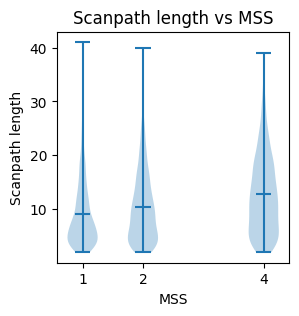

In [4]:
#Plot scanpath length vs MSS, and plot the regressions for scanpath length vs MSS and scanpath length vs log(MSS)

plt.figure(figsize=(3,3))

linear_regression = np.polyfit(dataframe['mss'], dataframe['scanpath_length'], 1)
log_regression = np.polyfit(np.log(dataframe['mss']), dataframe['scanpath_length'], 1)

mss_sizes = np.sort(dataframe['mss'].unique())


plt.violinplot([dataframe[dataframe['mss'] == mss]['scanpath_length'] for mss in mss_sizes], positions=mss_sizes, showmedians=False,showmeans=True)




plt.xlabel('MSS')
plt.ylabel('Scanpath length')
plt.title('Scanpath length vs MSS')

# Ticks at 1, 2 and 4 and with ints
plt.xticks([1, 2, 4], [1, 2, 4])

#print scanpath length mean per mss +- standard error where standard error is the standard deviation divided by the square root of the number of samples
print(dataframe.groupby('mss')['scanpath_length'].mean())
print(dataframe.groupby('mss')['scanpath_length'].std() / np.sqrt(dataframe.groupby('mss')['scanpath_length'].count()))



([<matplotlib.axis.XTick at 0x168dec17760>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(4, 0, '4')])

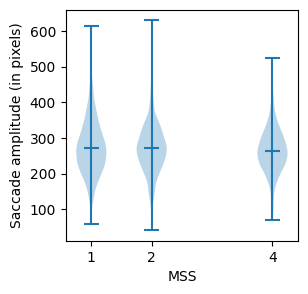

In [5]:
#Get the mean saccade amplitude for each subject, trial and mss
dataframe['mean_saccade_amplitude'] = dataframe['saccade_amplitude'].apply(lambda x: np.mean(x))
#Plot saccade amplitude distribution, maybe grouped by MSS

plt.figure(figsize=(3,3))

plt.violinplot([dataframe[dataframe['mss'] == mss]['mean_saccade_amplitude'] for mss in mss_sizes], positions=mss_sizes, showmedians=False,showmeans=True)
plt.xlabel('MSS')
plt.ylabel('Saccade amplitude (in pixels)')
# Ticks at 1, 2 and 4 and with ints
plt.xticks([1, 2, 4], [1, 2, 4])

([<matplotlib.axis.XTick at 0x168decc8b80>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(4, 0, '4')])

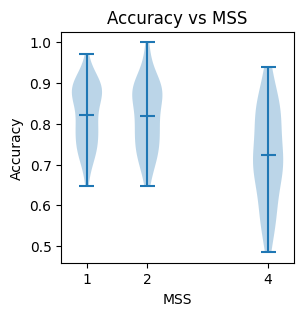

In [6]:
#Plot accuracy (mean of target_found) vs MSS
plt.figure(figsize=(3,3))

accuracy = dataframe.groupby('mss')['target_found'].mean()
accuracy_per_subject = dataframe.groupby(['subject', 'mss'])['target_found'].mean().unstack()


# For each MSS a violin plot depicting accuracy per subject, and show confidence intervals in the mean
plt.violinplot([accuracy_per_subject[mss].dropna() for mss in mss_sizes], positions=mss_sizes, showmedians=False,showmeans=True)



plt.xlabel('MSS')
plt.ylabel('Accuracy')
plt.title('Accuracy vs MSS')
# Ticks at 1, 2 and 4 and with ints
plt.xticks([1, 2, 4], [1, 2, 4])


In [7]:
# print the mean amount of refixations per mss and the standard error

print(dataframe.groupby('mss')['refixations'].mean())
print(dataframe.groupby('mss')['refixations'].std() / np.sqrt(dataframe.groupby('mss')['refixations'].count()))


mss
1    0.590132
2    0.723906
4    1.025748
Name: refixations, dtype: float64
mss
1    0.024034
2    0.026201
4    0.032682
Name: refixations, dtype: float64
